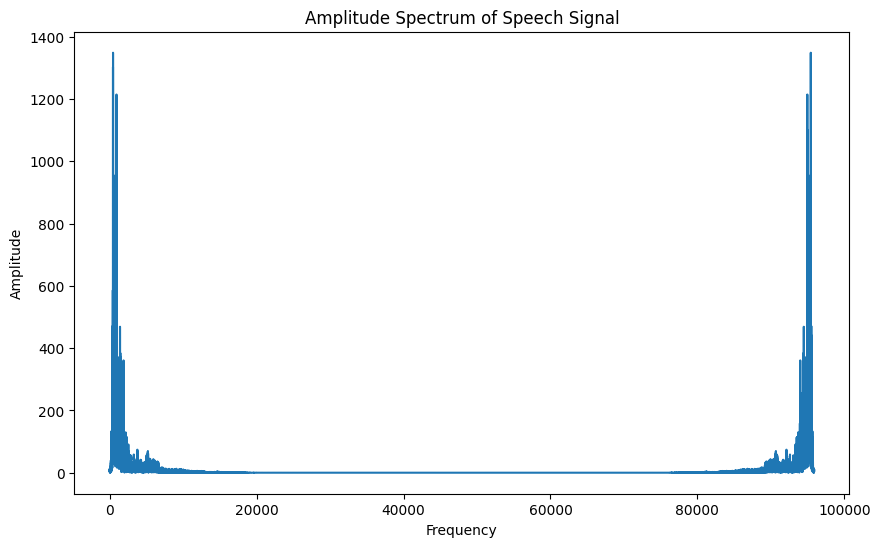

In [1]:
#A1

import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.signal as signal
speech_signal, sample_rate = librosa.load("speech.wav", sr=None)
spectrum = np.fft.fft(speech_signal)
amplitude_spectrum = np.abs(spectrum)
plt.figure(figsize=(10, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Speech Signal')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

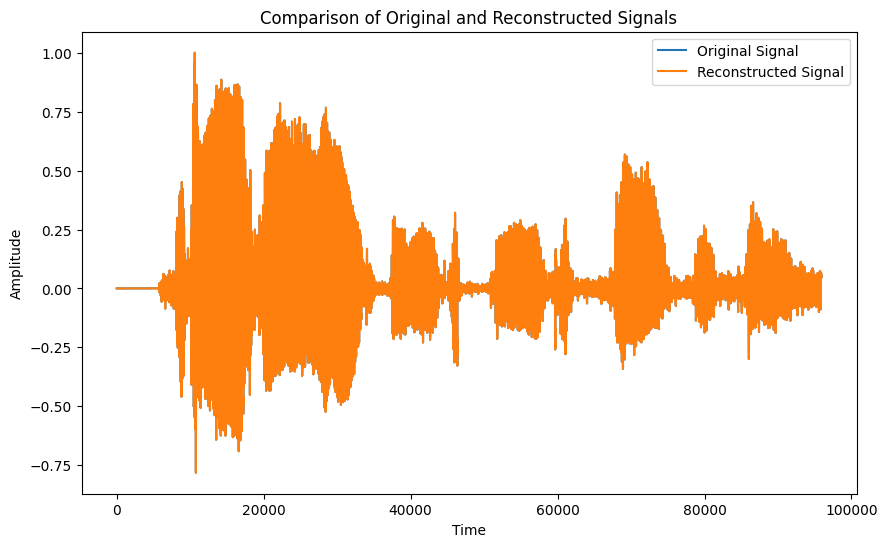

In [3]:
#A2
reconstructed_signal = np.fft.ifft(spectrum)
plt.figure(figsize=(10, 6))
plt.plot(speech_signal, label='Original Signal')
plt.plot(np.real(reconstructed_signal), label='Reconstructed Signal')
plt.title('Comparison of Original and Reconstructed Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

<ipython-input-7-1ccd470664d8>:16: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  librosa.display.specshow(librosa.power_to_db(full_spectrogram, ref=np.max), x_axis='time', y_axis='log', sr=sr)
<ipython-input-7-1ccd470664d8>:20: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  librosa.display.specshow(librosa.power_to_db(word_spectrogram, ref=np.max), x_axis='time', y_axis='log', sr=sr)


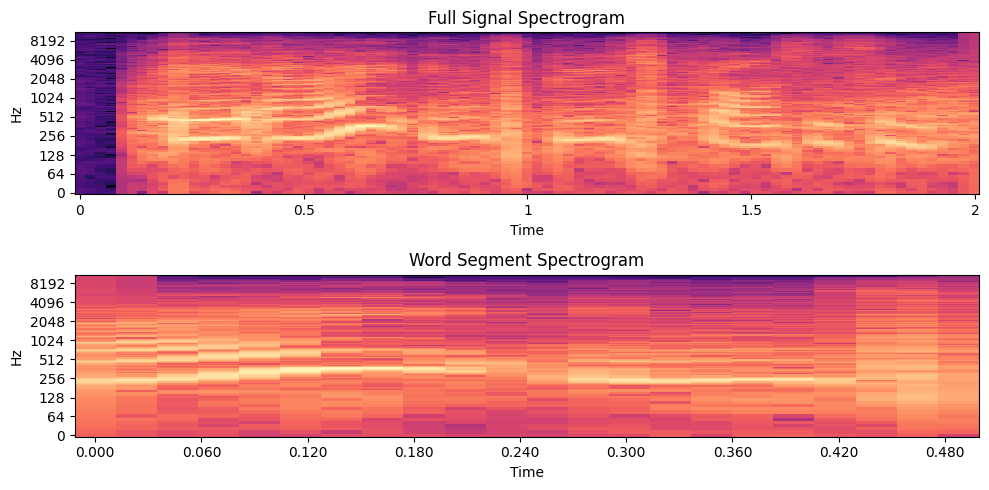

In [7]:
#A3
import librosa
import matplotlib.pyplot as plt

audio_path = "speech.wav"
y, sr = librosa.load(audio_path)

word_start_time = 0.5
word_end_time = 1.0
word_segment = y[int(word_start_time * sr):int(word_end_time * sr)]
full_spectrogram = librosa.stft(y)
word_spectrogram = librosa.stft(word_segment)
plt.figure(figsize=(10, 5))

plt.subplot(211)
librosa.display.specshow(librosa.power_to_db(full_spectrogram, ref=np.max), x_axis='time', y_axis='log', sr=sr)
plt.title("Full Signal Spectrogram")

plt.subplot(212)
librosa.display.specshow(librosa.power_to_db(word_spectrogram, ref=np.max), x_axis='time', y_axis='log', sr=sr)
plt.title("Word Segment Spectrogram")

plt.tight_layout()
plt.show()


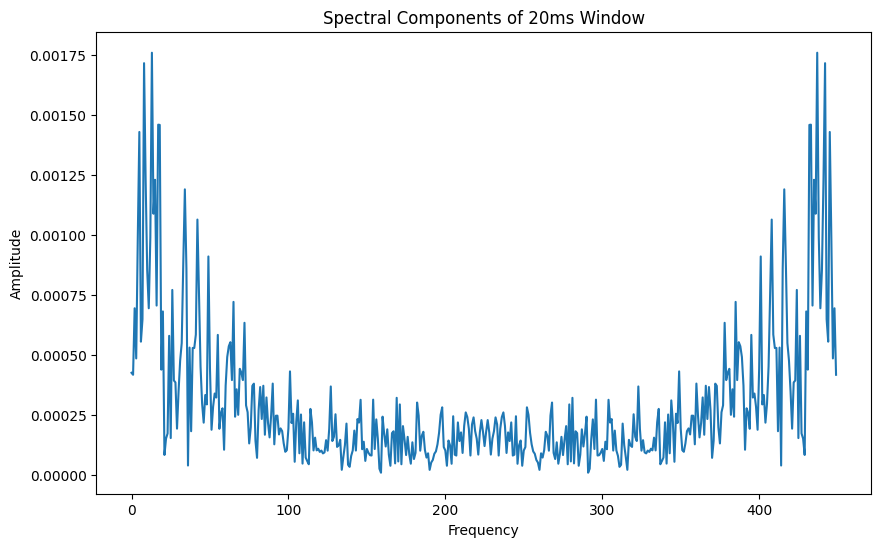

In [13]:
#A4

sample_rate = 22500
window_size = int(0.02 * sample_rate)
window = speech_signal[:window_size]
window_spectrum = np.fft.fft(window)
window_amplitude_spectrum = np.abs(window_spectrum)
plt.figure(figsize=(10, 6))
plt.plot(window_amplitude_spectrum)
plt.title('Spectral Components of 20ms Window')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

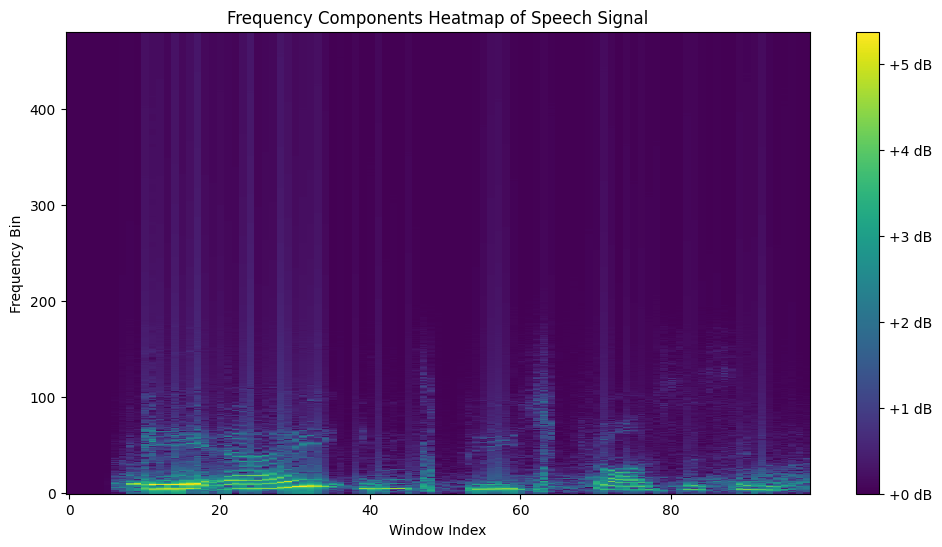

In [14]:
#A5
import numpy as np
import matplotlib.pyplot as plt
speech_file = "speech.wav"
speech_signal, sample_rate = librosa.load(speech_file, sr=None)
window_duration = 0.02
hop_length = int(sample_rate * window_duration)
num_windows = len(speech_signal) // hop_length
frequency_matrix = np.zeros((hop_length // 2 + 1, num_windows), dtype=np.float32)

for i in range(num_windows):
    start_idx = i * hop_length
    end_idx = start_idx + hop_length
    windowed_signal = speech_signal[start_idx:end_idx]
    spectrum = np.fft.rfft(windowed_signal)
    frequency_matrix[:, i] = np.abs(spectrum)
plt.figure(figsize=(12, 6))
plt.imshow(np.log1p(frequency_matrix), aspect='auto', origin='lower', cmap='viridis', interpolation='none')
plt.colorbar(format='%+2.0f dB')
plt.title('Frequency Components Heatmap of Speech Signal')
plt.xlabel('Window Index')
plt.ylabel('Frequency Bin')
plt.show()


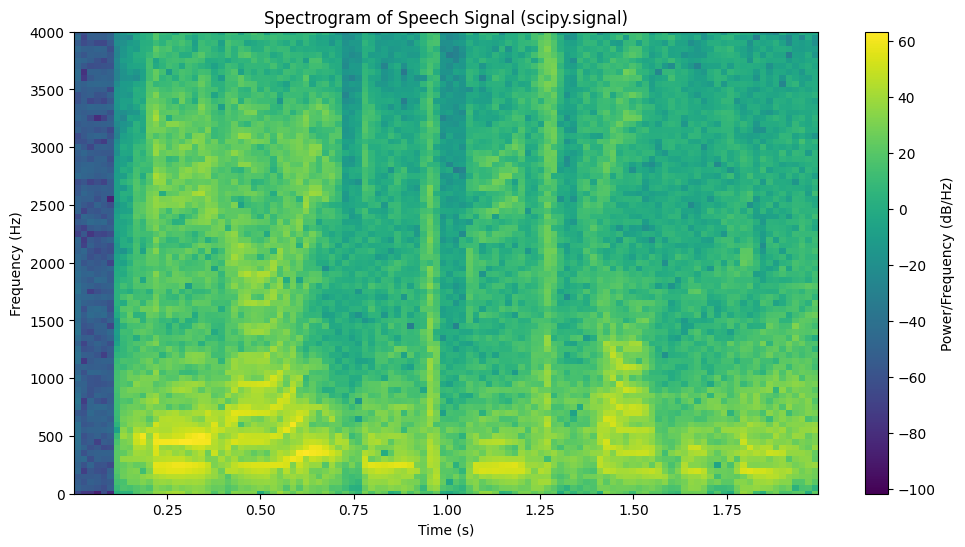

In [15]:
#A6
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
sample_rate, speech_signal = wavfile.read("speech.wav")
window_duration = 0.02
hop_length = int(sample_rate * window_duration)

frequencies, times, spectrogram_data = spectrogram(speech_signal, fs=sample_rate, nperseg=hop_length)
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='auto', cmap='viridis')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Spectrogram of Speech Signal (scipy.signal)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim([0, 4000])  # Adjust the frequency range as needed
plt.show()
